AIM: Generate DESEQ object and explore features (Part 2/3, ASAH ANALYSIS PIPELINE)

In [1]:
#Go to designated folder for R outputs
if (!dir.exists('/mnt/storage/r0768685/jupyternotebooks/ASAH_analysis/R_work')) {dir.create('/mnt/storage/r0768685/jupyternotebooks/ASAH_analysis/R_work')}
setwd('/mnt/storage/r0768685/jupyternotebooks/ASAH_analysis/R_work')

In [3]:
library("DESeq2")
library(scales)
options(repr.plot.width=4, repr.plot.height=3)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min



Attaching package: ‘S4Vectors’


The

In [18]:
matrixFile = path.expand("/mnt/storage/r0768685/jupyternotebooks/ASAH_analysis/replicate3/STAR_stuff/all.gene.counts")

In [26]:
countData <- as.matrix(read.csv(matrixFile, sep="\t", row.names="Geneid"))
head(countData)

,transgenic_plus.bam,X.mnt.storage.r0768685.jupyternotebooks.ASAH_analysis.replicate4.STAR_stuff.transgenic_plus.bam,transgenic_minus.bam,X.mnt.storage.r0768685.jupyternotebooks.ASAH_analysis.replicate4.STAR_stuff.transgenic_minus.bam
Gm16088,0,0,0,0
Gm26206,0,0,0,0
Xkr4,0,1,0,0
Gm1992,0,0,0,0
Gm27396,0,0,0,0
Rp1,0,0,0,0


In [27]:
colnames(countData) <- c("rep3_transgen_plus", "rep4_transgen_plus", "rep3_transgen_minus", "rep4_transgen_minus")
head(countData)

,rep3_transgen_plus,rep4_transgen_plus,rep3_transgen_minus,rep4_transgen_minus
Gm16088,0,0,0,0
Gm26206,0,0,0,0
Xkr4,0,1,0,0
Gm1992,0,0,0,0
Gm27396,0,0,0,0
Rp1,0,0,0,0


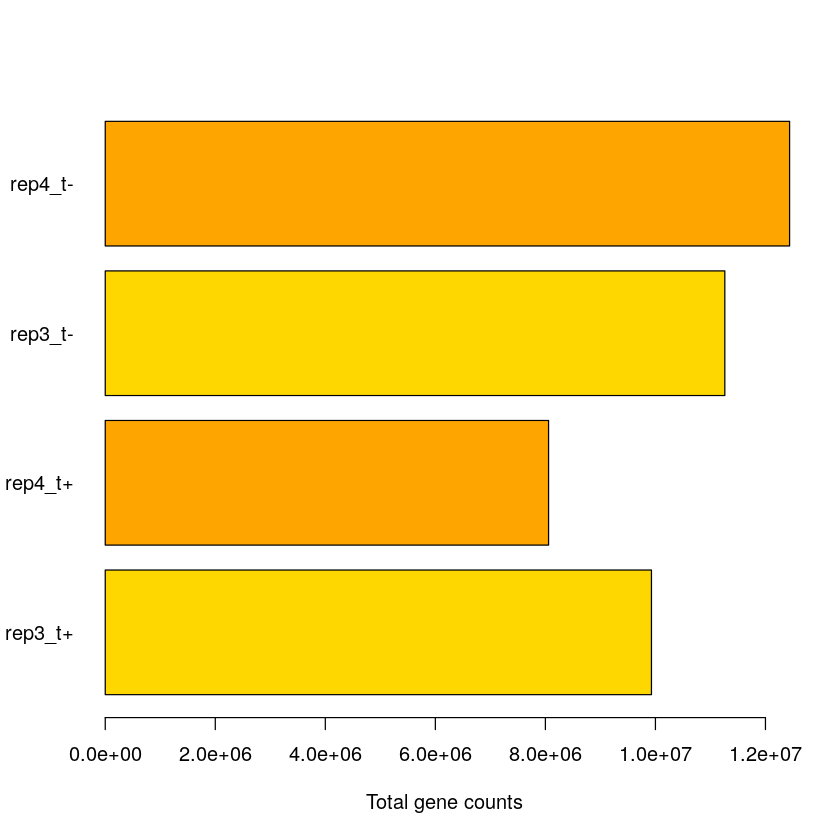

In [72]:
options(repr.plot.width=7, repr.plot.height=7)
barplot(colSums(countData),names.arg=c("rep3_t+", "rep4_t+", "rep3_t-", "rep4_t-"),xlab="Total gene counts",col=c('gold','orange'),horiz=TRUE,las=1)

The model with the transgene for ceramidase (t+ models) expressed much less proteins as compared to the mice without the transgene (t- models) in both cases (replicate 4 -> orange, replicate 3 -> yellow) [as expected, since ASAH+ transgenic mice are more toleract to alcohol exposure and hence have a higher baseline for gene expression]

In [61]:
#Make object for DESeq2 analysis
condition <- factor(c("T_plus", "T_plus", "T_minus", "T_minus"))
print(condition)

[1] T_plus  T_plus  T_minus T_minus
Levels: T_minus T_plus


In [62]:
colData <- data.frame(sampleName = colnames(countData), condition = condition)
colData

sampleName,condition
<fct>,<fct>
rep3_transgen_plus,T_plus
rep4_transgen_plus,T_plus
rep3_transgen_minus,T_minus
rep4_transgen_minus,T_minus


In [63]:
#Apply function DESeqDataSetFromMatrix()
dds <- DESeqDataSetFromMatrix(countData = countData,
                              colData = colData,
                              design = ~ condition)
colnames(dds) <- colnames(countData)

In [64]:
dds$condition

[1] T_plus  T_plus  T_minus T_minus
Levels: T_minus T_plus

In [65]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



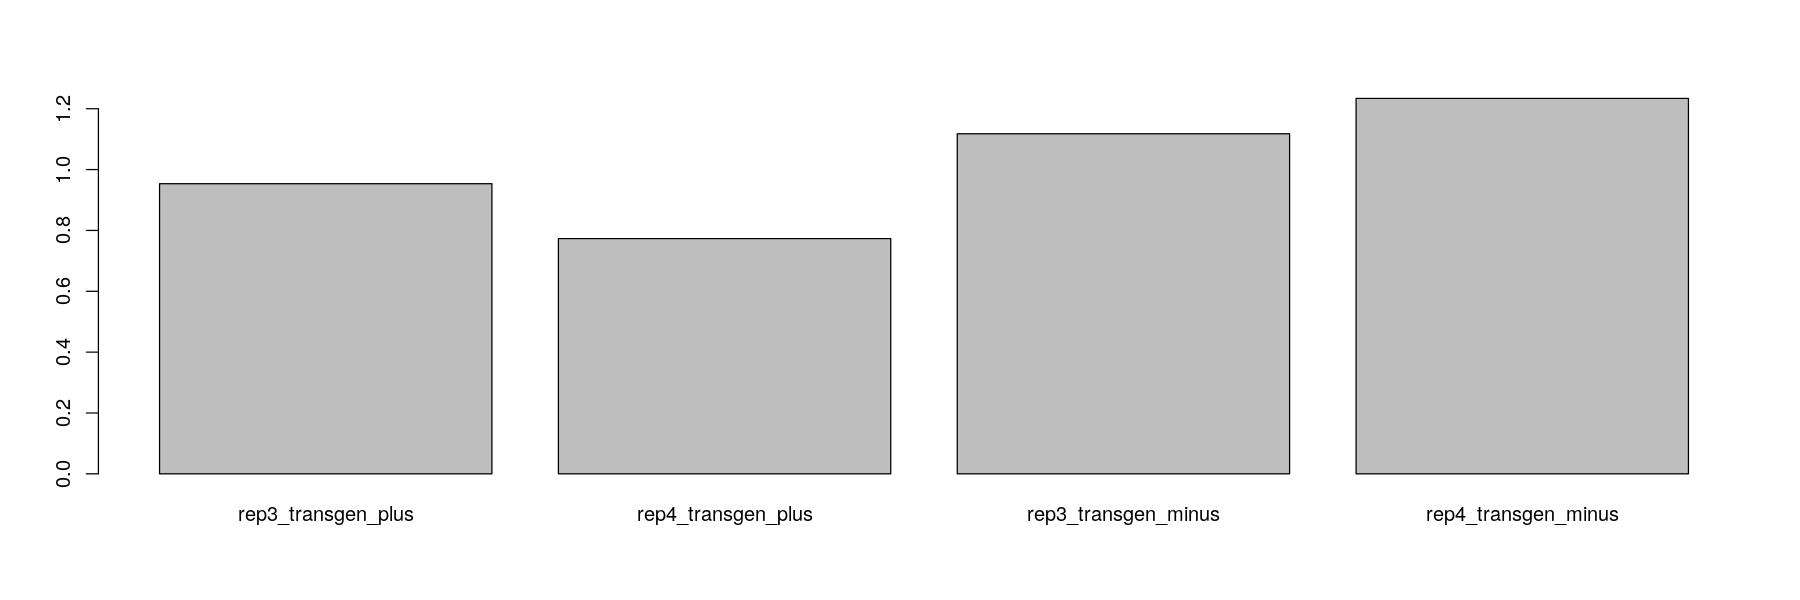

In [71]:
#Creating barplot from dds to verify correctness
options(repr.plot.width=15, repr.plot.height=5)
barplot(sizeFactors(dds))

This distribution fits our expectation as we have seen before in the bar plot

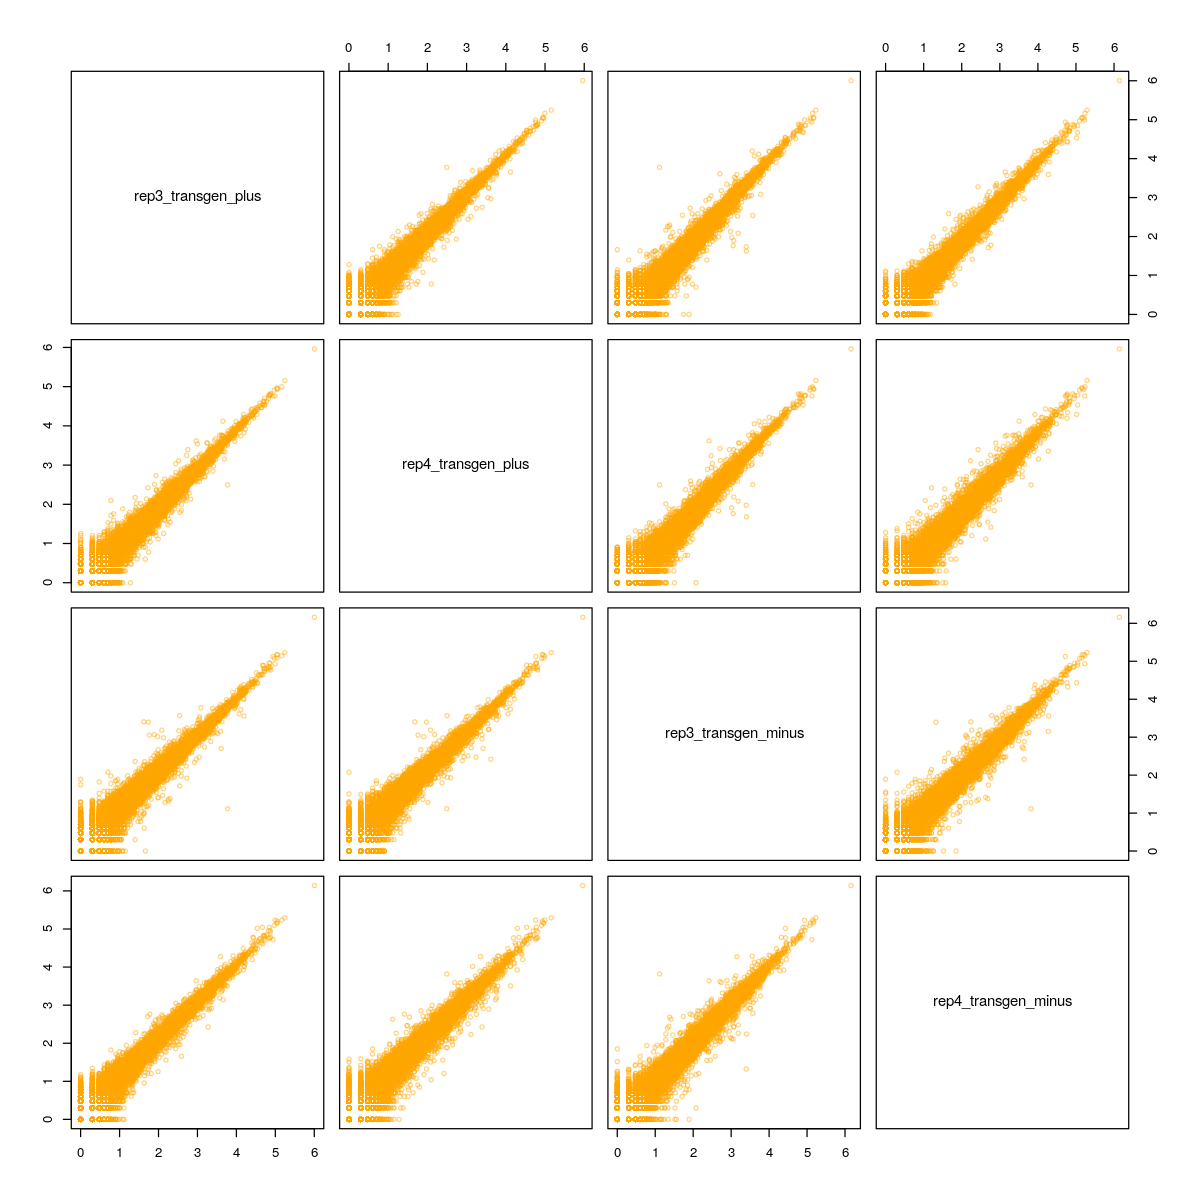

In [78]:
#Making scatter plot to test similarity between these 4 models against each other
options(repr.plot.width=10, repr.plot.height=10)
plot(data.frame(log10(counts(dds))), cex=0.7, col=alpha("orange", 0.5))

This scatter plot gives an overview of these significantly correlated models but not much insight of the data distribution within, so further try another plot

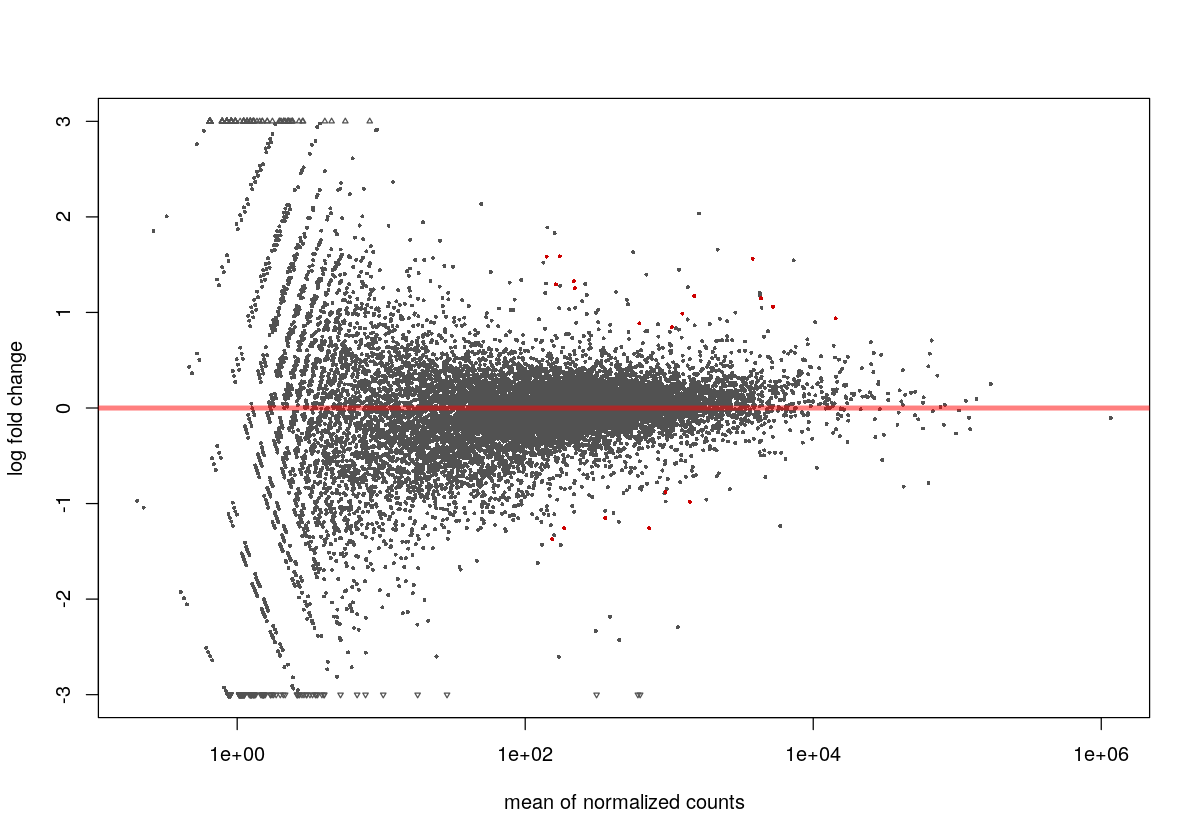

In [100]:
options(repr.plot.width=10, repr.plot.height=7)
plotMA(dds,ylim=c(-3,3))

There is visibly quite less red dots which must imply there are not a significant number of genes that get differentially expressed after the treatment of ASAH but we can assess the significantly up/down-regulated gene sets by analyzing them individually.

In [101]:
#Looking at number of DEGs
res <- results(dds)
res <- res[order(res$padj),]
head(res)

log2 fold change (MLE): condition T plus vs T minus 
Wald test p-value: condition T plus vs T minus 
DataFrame with 6 rows and 6 columns
                baseMean     log2FoldChange             lfcSE              stat
               <numeric>          <numeric>         <numeric>         <numeric>
Nos1ap  140.962569972171   1.58479823201758 0.351499208168535  4.50868222513239
Nnt      1236.2574615044  0.987190104698533  0.22169776340653  4.45286451937862
Tpm2    221.140233658757    1.2550027017943 0.295434063199892  4.24799594265187
Pctp     1392.6050841415 -0.982087366843469  0.23300245544383 -4.21492282118985
Acly    3794.17364469636   1.56246610168814 0.370072189414404   4.2220576049245
Cyp26a1 173.597260648508    1.5863726673814 0.378181229007259  4.19474195360169
                      pvalue               padj
                   <numeric>          <numeric>
Nos1ap  6.52315275031398e-06 0.0328591557398734
Nnt     8.47322221244802e-06 0.0328591557398734
Tpm2    2.15691300183746e-05 0.

In [193]:
write.table(res,'results_deseq_analysis.tsv',sep='\t')

In [104]:
dim(res)

[1] 41255     6

In [185]:
#Extract differentially expressed  genes that have adjusted p value below 0.5
res.sign <- res[(!is.na(res$padj)) & (res$padj < 0.5),]
dim(res.sign)

[1] 41  6

So we have 41 significantly down/up-regulated proteins [18, 23 respectively]

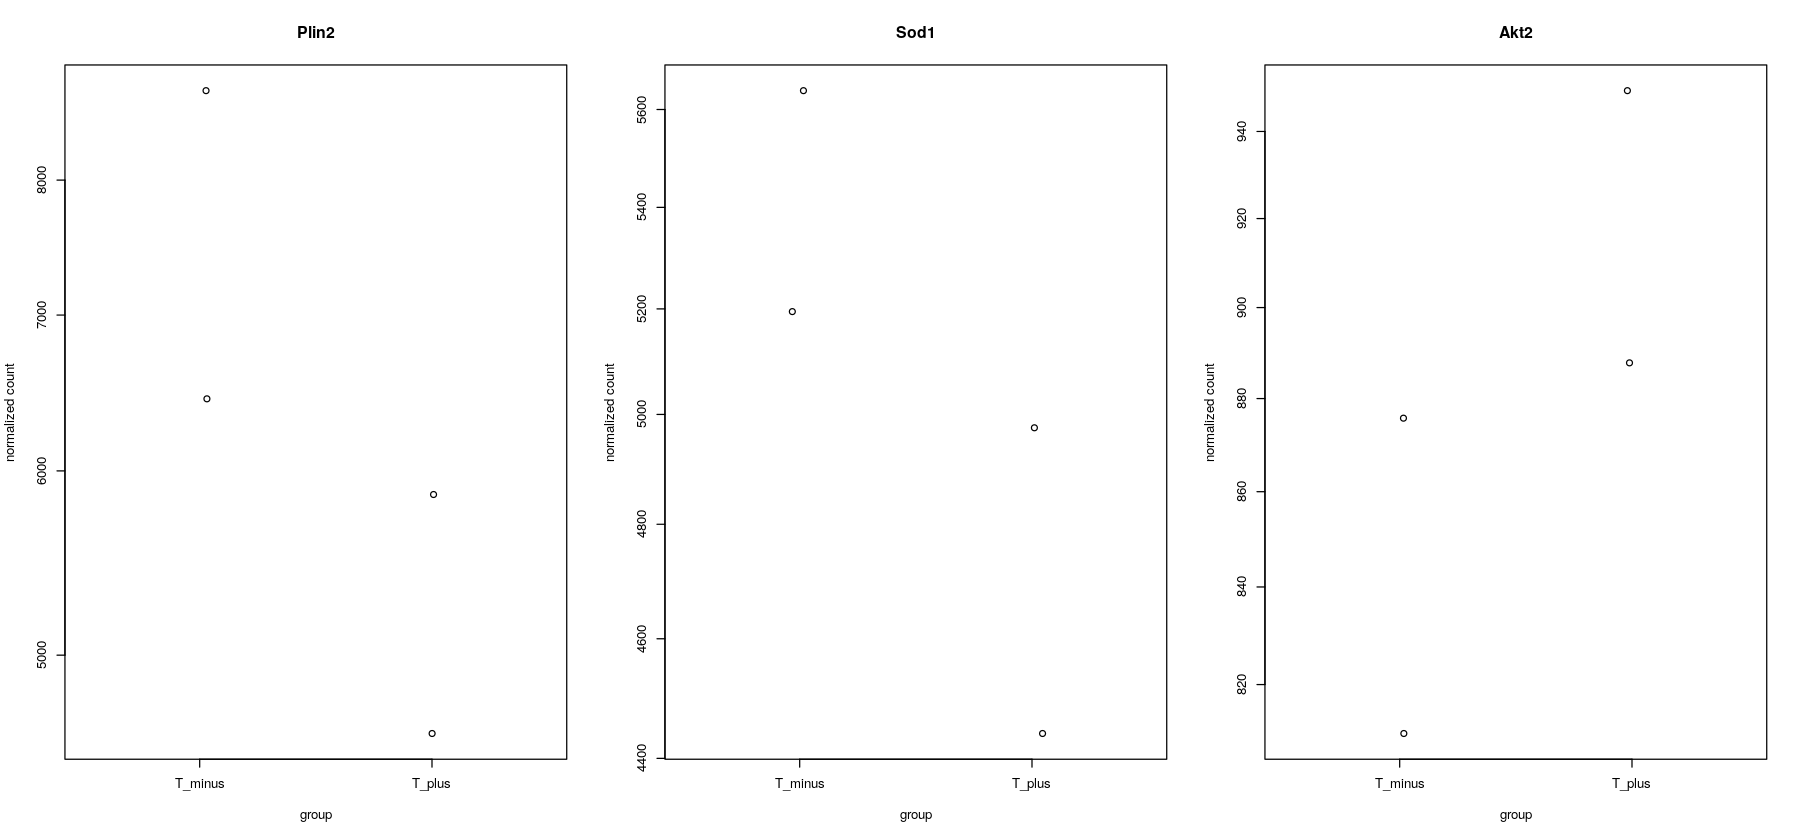

In [192]:
#Analyzing 3 essential proteins
options(repr.plot.width=15, repr.plot.height=7)
par(mfrow=c(1,3))
plotCounts(dds, gene="Plin2", normalized = TRUE)  
plotCounts(dds, gene="Sod1", normalized = TRUE)  
plotCounts(dds, gene="Akt2", normalized = TRUE)  

In transgenic+ models (alcohol fed mice that are enriched with ASAH lysozomal emzyme) <br />
**PLIN2**: DOWNREGULATED: An alcohol liquid diet promotes steatosis, PLIN2 upregulation & ceramide accumulation. Transgenic+ mice have reduced PLIN2 expression and reduced steatosis <br />
**Sod1**: DOWNREGULATED: Alcohol-fed transgenic+ mice have lower mRNA expression of SOD1 that leads to lower oxidative stress and lesser liver injury <br />
**AKT2**: UPREGULATED: Ceramide reduction in transgenic+ model improves hepatic insulin signaling in alcohol-fed mice by an Akt-mediated mechanism

<center> |----------|-----------|------------| </center>

NOTE: I wanted to assess logfoldchange in the res variable as done in the official bioconductor website 
(https://www.bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html) 
but I was unable to install the required package "apeglm"; I contacted Prof Stein regarding this as well.
However, this wasn't an urgent task since the next ipynb file accomplished a major set of my analysis.

In [106]:
#HAVE ASKED SIR TO HELP INSTALL THIS PACKAGE SO THAT LFC CAN BE ANALYSED

In [88]:
#SOURCE: https://www.bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("apeglm")
resLFC <- lfcShrink(dds, contrast=c("condition","T_plus","T_minus"), type="apeglm")


Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.3 (2020-02-29)

Installing package(s) 'apeglm'

Warning message in install.packages(...):
“'lib = "/usr/local/lib/R/site-library"' is not writable”


ERROR: Error in install.packages(...): unable to install packages
